In [275]:
import seaborn as sns
import numpy as np
from sklearn.datasets import make_blobs
from scipy.spatial import distance

In [276]:
#centers = [[1, 2],[7, 8]]
centers = [[0, 0],[1, 1]]
data, labels = make_blobs(n_samples=10, centers=centers) 
# n_samples: number of samples, centers: number of centers

In [277]:
# calculate inerie totale of data
def inerie_totale(data):
    inerie_totale = 0
    for i in range(len(data)):
        inerie_totale += distance.euclidean(data[i], np.mean(data, axis=0))**2
    return inerie_totale
print ("Inerie totale: ", inerie_totale(data)/data.shape[0])

# PROF VERSION
def inerie_totale_prof(data):
   g=np.mean(data,axis=0)
   inerie_totale=0
   for i in range(data.shape[0]):
     inerie_totale += distance.euclidean(data[i],g)**2
   return inerie_totale/data.shape[0]
print ("Inerie totale prof: ", inerie_totale_prof(data))
print(data.shape[0])

Inerie totale:  2.0624850223101965
Inerie totale prof:  2.0624850223101965
10


In [278]:
np.unique(labels)

array([0, 1])

In [279]:
print(data)

[[ 1.19605782  1.37164157]
 [-0.75420273  1.62750207]
 [-0.19479298  0.87034616]
 [ 1.3547336  -0.14895913]
 [ 2.39587137  2.33959555]
 [ 0.33326326  0.64182416]
 [ 0.88100105  1.3684675 ]
 [-0.3992308   0.85190342]
 [-1.05978622 -1.05312246]
 [ 0.5883318  -0.74436901]]


In [280]:
labels

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0])

<Axes: >

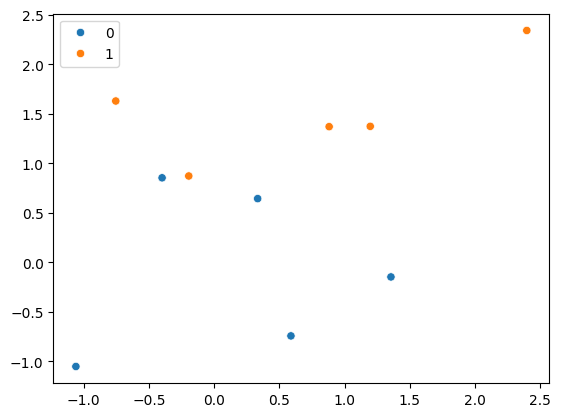

In [281]:
sns.scatterplot(x=data[:,0], y=data[:,1], hue=labels)

In [282]:
# Inertier inter_
def inertieInter (data, labels):
    inertie = 0
    for i in range(len(data)):
        inertie += distance.euclidean(data[i], centers[labels[i]])
    return inertie


In [283]:
print(inertieInter(data, labels)) 

11.27669113259652


In [284]:
# Inertie Intra
def inertieIntra (data, labels):
    inertie = 0
    for i in range(len(data)):
        inertie += distance.euclidean(data[i], centers[labels[i]])
    return inertie / len(data)


In [285]:
print(inertieIntra(data, labels))

1.127669113259652


In [286]:
print(inertieInter(data, labels) + inertieIntra(data, labels))

12.404360245856171
